## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们学习了基本的机器学习概念，你已经对机器学习的这些方法有一个基本的认识了。
值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。
而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。
很可能有一天，神经网络也会被淘汰，但重要的是我们要理解机器学习的目标，就是尽可能自动化地解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [1]:
%matplotlib inline

import numpy as np

random_data = np.random.random((20, 2))

random_data

array([[0.62020543, 0.49803517],
       [0.28308371, 0.93706307],
       [0.29142469, 0.48892783],
       [0.54243486, 0.15105637],
       [0.67107948, 0.19435051],
       [0.71767839, 0.85665367],
       [0.10451105, 0.33459575],
       [0.59950126, 0.93902744],
       [0.88502975, 0.44579358],
       [0.60239489, 0.05244291],
       [0.68366619, 0.20857741],
       [0.17655762, 0.51935862],
       [0.18790128, 0.99719706],
       [0.49830371, 0.43464878],
       [0.12993282, 0.24696387],
       [0.33185016, 0.52190003],
       [0.95431346, 0.55596142],
       [0.52410477, 0.57272184],
       [0.13949809, 0.57318498],
       [0.92293711, 0.78940129]])

In [2]:
import matplotlib.pyplot as plt

X = random_data[:, 0]
y = random_data[:, 1]

import random

In [3]:
def assmuing_function(x):
    return 13.4 * x + 5 + random.randint(-5, 5)

In [4]:
y = [assmuing_function(x) for x in X]

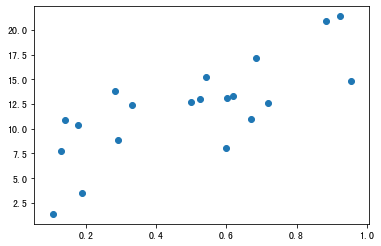

In [5]:
plt.scatter(X, y)

In [6]:
y = np.array(y)
y

array([13.31075279, 13.79332166,  8.90509089, 15.26862712, 10.99246498,
       12.61689041,  1.40044811,  8.03331688, 20.85939867, 13.07209157,
       17.16112695, 10.36587205,  3.51787718, 12.67726974,  7.74109982,
       12.44679209, 14.78780041, 13.02300395, 10.86927436, 21.36735721])

In [7]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X.reshape(-1, 1), y)
reg.score(X.reshape(-1, 1), y)

0.5685549315806795

In [8]:
reg.coef_

array([13.43140908])

In [9]:
reg.intercept_

5.484505259507001

In [10]:
def f(x):
    return reg.coef_ * x + reg.intercept_

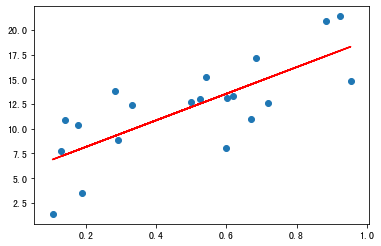

In [11]:
plt.scatter(X, y)
plt.plot(X, f(X), color='red')

In [12]:
X

array([0.62020543, 0.28308371, 0.29142469, 0.54243486, 0.67107948,
       0.71767839, 0.10451105, 0.59950126, 0.88502975, 0.60239489,
       0.68366619, 0.17655762, 0.18790128, 0.49830371, 0.12993282,
       0.33185016, 0.95431346, 0.52410477, 0.13949809, 0.92293711])

In [13]:
reg.predict([[0.9]])

array([17.57277343])

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [14]:
def model(X, y):
    return [(Xi, yi) for Xi, yi in zip(X, y)]

In [15]:
from scipy.spatial.distance import cosine

def distance(x1, x2):
    return cosine(x1, x2)

In [16]:
def predict(x, k=5):
    most_similars = sorted(model(X, y), key=lambda xi: distance(xi[0], x))[:k]
    
    y_hats = [_y for x, _y in most_similars]
    
    print(most_similars)
    
    return np.mean(y_hats)


In [17]:
X, y

(array([0.62020543, 0.28308371, 0.29142469, 0.54243486, 0.67107948,
        0.71767839, 0.10451105, 0.59950126, 0.88502975, 0.60239489,
        0.68366619, 0.17655762, 0.18790128, 0.49830371, 0.12993282,
        0.33185016, 0.95431346, 0.52410477, 0.13949809, 0.92293711]),
 array([13.31075279, 13.79332166,  8.90509089, 15.26862712, 10.99246498,
        12.61689041,  1.40044811,  8.03331688, 20.85939867, 13.07209157,
        17.16112695, 10.36587205,  3.51787718, 12.67726974,  7.74109982,
        12.44679209, 14.78780041, 13.02300395, 10.86927436, 21.36735721]))

In [18]:
myself_knn = model(X, y)

In [19]:
predict(0.9)

[(0.10451105292821028, 1.4004481092380177), (0.13949808667777108, 10.869274361482132), (0.6202054320200528, 13.310752789068708), (0.2830837063104603, 13.793321664560168), (0.2914246929544909, 8.905090885590178)]


9.65577756198784

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [20]:
from collections import Counter

from icecream import ic

In [21]:
def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    ic(probs)
    return - sum(p * np.log(p) for p in probs)

In [22]:
entropy([1, 1, 1, 1])

ic| probs: [1.0]


-0.0

In [23]:
entropy([1, 1, 1, 0])

ic| probs: [0.25, 0.75]


0.5623351446188083

In [24]:
entropy([2, 3, 3, 3])

ic| probs: [0.25, 0.75]


0.5623351446188083

In [25]:
entropy([2, 3, 3, 4])

ic| probs: [0.25, 0.5, 0.25]


1.0397207708399179

In [26]:
entropy([1, 2, 2, 3])

ic| probs: [0.25, 0.5, 0.25]


1.0397207708399179

In [27]:
ic(entropy([1, 2, 3, 4]))

ic| probs: [0.25, 0.25, 0.25, 0.25]
ic| Error: Failed to access the underlying source code for analysis. Was ic() invoked in an interpreter (e.g. python -i), a frozen application (e.g. packaged with PyInstaller), or did the underlying source code change during execution?


1.3862943611198906

## 决策树怎么来决定，用哪一个特征来进行分割呢？ 

In [28]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
   # 'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [29]:
import pandas as pd

In [30]:
dataset = pd.DataFrame.from_dict(mock_data)

In [31]:
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [32]:
# split_by_gender
print(entropy([1, 1, 1, 0]) + entropy([0, 0, 1]))

# split_by_income
print(entropy([1, 1, 0, 0, 0]) + entropy([1, 1]))

# split_by_family_number
print(entropy([1, 1, 0, 0, 0]) + entropy([1, 1]))

ic| probs: [0.25, 0.75]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| probs: [0.6, 0.4]
ic| probs: [1.0]


1.198849312913621
0.6730116670092565
0.6730116670092565


## 决策树在选择决策顺序时，是根据这个特征进行分割之后，数据的熵最小原则进行的。

In [33]:
set(mock_data['family_number'])

{1, 2}

In [34]:
set(mock_data['gender'])

{'F', 'M'}

In [35]:
sub_split_1 = dataset[dataset['family_number'] == 1]['bought'].tolist()

In [36]:
sub_split_1

[1, 1, 0, 0, 0]

In [37]:
sub_split_2 = dataset[dataset['family_number'] != 1]['bought'].tolist()

In [38]:
sub_split_2

[1, 1]

In [39]:
entropy(sub_split_1) + entropy(sub_split_2)

ic| probs: [0.6, 0.4]
ic| probs: [1.0]


0.6730116670092565

In [40]:
splited_data = dataset[dataset['family_number'] == 1]

In [41]:
splited_data

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [42]:
splited_data[splited_data['income'] == '+10']

,gender,income,family_number,bought
0,F,+10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [43]:
splited_data[splited_data['income'] == '-10']

,gender,income,family_number,bought
1,F,-10,1,1


In [44]:
# split by income
entropy([1, 0, 0, 0]) + entropy([1])

ic| probs: [0.75, 0.25]
ic| probs: [1.0]


0.5623351446188083

In [45]:
# split by gender
entropy([1, 1, 0]) + entropy([0, 0])

ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| probs: [1.0]


0.6365141682948128

## ==> 根据信息熵，我们得到了一个决策过程：

```
第一步： 我们观察他的家庭成员：
        如果他的家庭成员是2人，那么就会购买，如果不是2人，我们继续决策
第二部： 我们观察他的收入情况：
        如果他的收入是'+10'， 那么他有 3/4 的概率会购买，如果是 '-10', 那么，他肯定不买
```

In [46]:
set(dataset.columns.tolist()) - {'bought'}

{'family_number', 'gender', 'income'}

In [188]:
def find_the_optimal_spliter(training_data: pd.DataFrame, target: str):
    x_fileds = set(training_data.columns.tolist()) - {target}
    
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fileds:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            ic(sub_spliter_1)
            
            entropy_1 = entropy(sub_spliter_1)
            ic(entropy_1)
            
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            ic(sub_spliter_2)
            
            entropy_2 = entropy(sub_spliter_2)
            ic(entropy_2)
            
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    
    return spliter

In [189]:
find_the_optimal_spliter(training_data=dataset, target='bought')

ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_spliter_1: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| sub_spliter_1: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_1: 0.6365141682948128
ic| sub_spliter_2: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_spliter_1: [1, 1

spliter is: ('income', '-10')
the min entropy is: 0.6730116670092565


('income', '-10')

In [49]:
dataset[dataset['family_number'] == 1]

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [50]:
find_the_optimal_spliter(dataset[dataset['family_number'] == 1], 'bought')

ic| f: 'family_number'
ic| values: {1}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: []
ic| probs: []
ic| entropy_2: 0
ic| entropy_v: 0.6730116670092565
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_spliter_1: [1, 1, 0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| entropy_1: 0.6365141682948128
ic| sub_spliter_2: [0, 0]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6365141682948128
ic| sub_spliter_1: [0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 0.6365141682948128
ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_spliter_1: [1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: [1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.5623351446188083
ic| sub_spliter_1: [1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 0, 0, 0]
i

spliter is: ('income', '-10')
the min entropy is: 0.5623351446188083


('income', '-10')

In [51]:
fm_n_1 = dataset[dataset['family_number'] == 1]

In [52]:
fm_n_1[fm_n_1['income'] == '+10']

,gender,income,family_number,bought
0,F,+10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [53]:
# split_gender
print(entropy([1, 0]) + entropy([0, 0]))

# split_family_number
print(entropy([1, 0, 0, 0]))

ic| probs: [0.5, 0.5]
ic| probs: [1.0]
ic| probs: [0.75, 0.25]


0.6931471805599453
0.5623351446188083


In [54]:
fm_n_1[fm_n_1['income'] != '+10']

,gender,income,family_number,bought
1,F,-10,1,1


In [55]:
find_the_optimal_spliter(fm_n_1[fm_n_1['income'] == '+10'], 'bought')

ic| f: 'family_number'
ic| values: {1}
ic| sub_spliter_1: [1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: []
ic| probs: []
ic| entropy_2: 0
ic| entropy_v: 0.5623351446188083
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_spliter_1: [1, 0]
ic| probs: [0.5, 0.5]
ic| entropy_1: 0.6931471805599453
ic| sub_spliter_2: [0, 0]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6931471805599453
ic| sub_spliter_1: [0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 0]
ic| probs: [0.5, 0.5]
ic| entropy_2: 0.6931471805599453
ic| entropy_v: 0.6931471805599453
ic| f: 'income'
ic| values: {'+10'}
ic| sub_spliter_1: [1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: []
ic| probs: []
ic| entropy_2: 0
ic| entropy_v: 0.5623351446188083


spliter is: ('income', '+10')
the min entropy is: 0.5623351446188083


('income', '+10')

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [56]:
from sklearn.cluster import KMeans

In [57]:
X1 = [random.randint(0, 100) for _ in range(100)]
X2 = [random.randint(0, 100) for _ in range(100)]

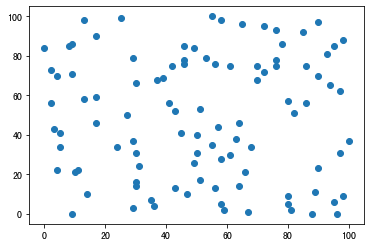

In [58]:
plt.scatter(X1, X2)

In [62]:
trainning_data = [[x1, x2] for x1, x2 in zip(X1, X2)]

In [64]:
cluster = KMeans(n_clusters=6, max_iter=500)

In [65]:
cluster.fit(tranning_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [66]:
cluster.cluster_centers_

array([[ 9.91666667, 77.41666667],
       [88.41666667, 11.16666667],
       [82.42857143, 77.        ],
       [56.        , 25.68421053],
       [46.        , 74.64705882],
       [19.94736842, 24.15789474]])

In [67]:
cluster.labels_

array([1, 2, 1, 3, 5, 5, 3, 2, 3, 2, 4, 0, 2, 2, 5, 4, 0, 5, 4, 4, 5, 2,
       3, 0, 3, 1, 5, 1, 0, 2, 5, 4, 0, 4, 3, 3, 5, 1, 1, 5, 2, 4, 5, 4,
       2, 4, 1, 2, 2, 3, 1, 0, 1, 5, 3, 2, 5, 4, 0, 4, 5, 2, 3, 5, 5, 1,
       3, 3, 3, 3, 3, 1, 2, 4, 0, 1, 2, 0, 3, 0, 3, 2, 5, 3, 5, 0, 4, 2,
       0, 2, 3, 4, 2, 5, 2, 2, 5, 4, 4, 4], dtype=int32)

In [68]:
from collections import defaultdict

In [70]:
centers = defaultdict(list)

In [71]:
for label, location in zip(cluster.labels_, tranning_data):
    centers[label].append(location)

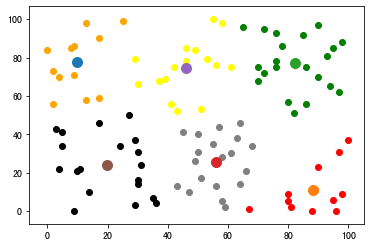

In [72]:
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])
        
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

对于一个决策，我们把需要考虑到的各个因素称为feature，把目标设为y，模型就是从feature到目标y的映射关系。有了这个模型，就可以根据feature，自动得到目标y。
比如模特，我们希望看到一件衣服穿在人身上是什么效果，好不好看，所以才有了模特这个职业，模特就是一个model，衣服就是feature，传到模特身上，在T台上展现出来的就是结果/目标。
比如我们需要知道新研发出的一款飞机在各种风速、天气等条件下的性能，就可以做一个飞机模型，然后模拟出各种风速、天气条件，让这个飞机模型去飞，就可以得出结果。


任何一个问题，其实都有无数个影响因素。我们提出的任何model，肯定都忽略了一些因素，所以所有模型都不可能完全准确，所以所有模型都是错的。
但有时候忽略掉的那些因素在绝大部分情况下都不重要，所以这些model能在一定程度上比较准确地反应客观世界，在总体上来说，或者说从概率学上 来讲，这样的model就是有用的。
比如你今天跟女朋友求婚是否能成功呢？
主要的影响因素是：
1.你们的感情是否已经足够深厚？她是否足够信任你？
2.你们现在的客观条件是否具备？你有房吗？你有车吗？哈哈
3.你们见父母了吗？
但也会有一些随机因素，比如你女朋友昨天看了个电影，里边有个渣男，和你长得挺像的，哈哈，那你可能就会失败。。。。。。
但这个模型不能说没用，它从总体上来讲还是有用的。

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)


欠拟合常常在模型学习能力较弱，而数据复杂度较高的情况下出现。此时模型由于学习能力不足，无法学习到数据集中的一般规律，因而导致泛化能力弱。
过拟合常常在模型学习能力过强的情况中出现，此时的模型学习能力太强，以至于将训练集单个样本自身的特点都能捕捉到，并将其认为是一般规律。
欠拟合在训练集和测试集上的性能都很差，而过拟合往往能较好地学习训练集数据的性质，而在测试集上的性能较差。
欠拟合主要表现为输出结果的高偏差，过拟合主要表现为输出结果的高方差。

欠拟合出现的原因：
- 模型复杂度过低
- 特征量过少


过拟合出现原因：
- 建模样本选取有误，如样本数量太少，选样方法错误，样本标签错误等，导致选取的样本数据不足以代表预定的分类规则
- 样本噪音干扰过大，使得机器将部分噪音认为是特征从而扰乱了预设的分类规则
- 假设的模型无法合理存在，或者说假设成立的条件实际并不成立
- 参数太多，模型复杂度过高


参考：https://www.cnblogs.com/zhhfan/p/10476761.html

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

假设我们的目标是判断是不是垃圾邮件，说的话程序输出1，不是输出0

10个数据的真实情况：

[1, 1, 1, 1, 0, 1, 0, 0, 1, 1]

我们的函数f(x)：

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1]


precision: 所有说‘是’的而且正确的预测个数 / 所有说‘是’的预测个数

 6 / 9

recall: 所有说‘是’而且正确的预测个数 / 所有实际数据为‘是’的个数

6 / 7

precision 精确率：抓起来的人里，是坏人的比例要尽可能高

recall 召回率，宁可错杀一千，绝不放走一个。

precision 和 recall 是需要相互妥协的，如果一个太高，另一个就会降低

### F1score = $ \frac{2*precision*recall}{precision + recall} $

F1score 将 precision 和 recall 进行平衡

F2score 是指召回率比准确率重要一倍

参考：https://www.jianshu.com/p/a4d3c393f9b5

In [ ]:
AUC: 衡量模型本身好坏，而不是衡量阈值好坏的方法。
适用于数据不均衡的情况，这种情况下要么 precision很低，要么recall很低，

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

机器学习的基本问题是利用模型对数据进行拟合，学习的目的不是对有限训练集进行正确与猜测，而是对未曾在训练集合出现的样本能够进行正确预测。

y = kx + b 这个函数 
传统的编程，需要程序员求出参数k 和 b
机器学习，程序员只需要根据现有数据，给出一个大概的框架、方向，计算机可以通过不断输入的数据，最终自己求出参数 k 和 b

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

正确

评价标准正确了，相当于有了正确的目标，也才能按照正确的目标选择训练数据，确定初始模型等。优化模型的方向也才能正确，否则就是在向错误的方向努力。

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You should finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

参考：https://juejin.im/post/5aa503b4518825555d46e1d8

In [237]:
import numpy as np
import pandas as pd
import operator
from icecream import ic

In [238]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [285]:
dataSet = pd.DataFrame.from_dict(mock_data)
dataSet

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [278]:
def loadDataSet(dataSet):
    # 对数据进行处理
    labelSet = list(dataSet[:0])
    dataSet = dataSet.values
    return dataSet, labelSet

In [279]:
def calcShannonEnt(dataSet):
    """
    计算给定数据集的信息熵（香农熵）
    @ param dataSet: 数据集
    @ return shannonEnt: 香农熵
    """
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet:
        # 当前样本类型
        currentLabel = featVec[-1]
        # 如果当前类别不在labelCounts里面，则创建
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key]) / numEntries
        shannonEnt -= prob*np.log2(prob)
    return shannonEnt

In [280]:
def splitDataSet(dataSet, axis, value):
    """
    划分数据集, 提取所有满足一个特征的值
    @ param dataSet: 数据集
    @ param axis: 划分数据集的特征
    @ param value: 提取出来满足某特征的list
    """
    retDataSet = []
    for featVec in dataSet:
        # 将相同数据特征的提取出来
        if featVec[axis] == value:
            reducedFeatVec = list(featVec[:axis])
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [281]:
def chooseBestFeature(dataSet):
    """
    选择最优的划分属性
    @ param dataSet: 数据集
    @ return bestFeature: 最佳划分属性
    """
    # 属性的个数
    numFeature = len(dataSet[0])-1
    baseEntroy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0
    bestFeature = -1
    for i in range(numFeature):
        # 获取第i个特征所有可能的取值
        featureList = [example[i] for example in dataSet]
        # 去除重复值
        uniqueVals = set(featureList)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            # 特征为i的数据集占总数的比例
            prob = len(subDataSet) / float(len(dataSet))
            newEntropy += prob * np.log2(prob)
        inforGain = baseEntroy - newEntropy

        if inforGain > bestInfoGain:
            bestInfoGain = inforGain
            bestFeature = i
    return bestFeature

In [282]:
def majorityCnt(classList):
    """
    递归构建决策树
    @ param classList: 类别列表
    @ return sortedClassCount[0][0]: 出现次数最多的类别
    """
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    # 排序
    sortedClassCount = sorted(
        classCount.items(), key=operator.itemgetter(1), reverse=True)
    # 返回出现次数最多的
    return sortedClassCount[0][0]

In [283]:
def createTree(dataSet, labels):
    """
    构造决策树
    @ param dataSet: 数据集
    @ param labels: 标签集
    @ return myTree: 决策树
    """
    classList = [example[-1] for example in dataSet]
    # 当类别与属性完全相同时停止,此时classList就是我们想要的判定结果
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    # 遍历完所有特征值时，返回数量最多的。也就是如果遍历完所有特征值，还无法做出决断，
    # 就按结果那一列中最多的 作为判定结果
    if (len(dataSet[0]) == 1):
        return majorityCnt(classList)

    # 获取最佳划分属性
    bestFeat = chooseBestFeature(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel: {}}
    # 清空labels[bestFeat]
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        # 递归调用创建决策树
        myTree[bestFeatLabel][value] = createTree(
            splitDataSet(dataSet, bestFeat, value), subLabels)
    return myTree

In [284]:
dataSet, labelSet = loadDataSet(dataSet)
shannonEnt = calcShannonEnt(dataSet)
tree = createTree(dataSet, labelSet)
tree

{'gender': {'F': {'income': {'+10': {'family_number': {1: 1, 2: 1}},
    '-10': 1}},
  'M': {'income': {'+10': 0, '-10': 1}}}}

In [292]:
x = {'gender': 'M', 'income': '-10', 'family_number': 1}

In [312]:
def traverse_tree(tree, x):
    for key, value in tree.items():
        for k, v in x.items():
            if k == key:
                tree = tree[key][v]     
    return tree

In [314]:
def predicate(tree, x):
    if isinstance(tree, dict):
        tree = traverse_tree(tree, x)(tree, x)
    return tree

In [315]:
predicate(tree, x)

1

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是否能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [316]:
from sklearn.datasets import load_boston
import random

In [317]:
dataset = load_boston()

In [318]:
x, y = dataset['data'], dataset['target']

In [319]:
x.shape

(506, 13)

In [320]:
y.shape

(506,)

In [324]:
X_rm = x[:, 5]

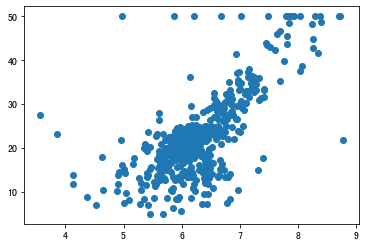

In [325]:
plt.scatter(X_rm, y)

In [326]:
def price(rm, k, b):
    return k * rm + b

In [327]:
def loss(y, y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat)))/len(list(y))

In [328]:
def partial_derivative_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    return -1 / n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    return -1 / n * gradient

In [331]:
k = random.random() * 200 - 100
b = random.random() * 200 - 100


learning_rate = 1e-3

iteration_num = 200
losses = []

for i in range(iteration_num):
    price_use_current_parameters = [price(r, k, b) for r in X_rm]
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)  
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

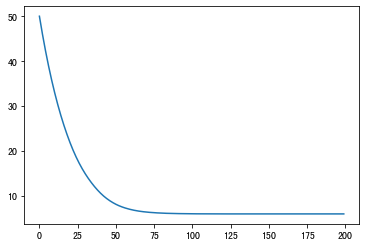

In [332]:
plt.plot(list(range(iteration_num)), losses)

/Users/huazai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/huazai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


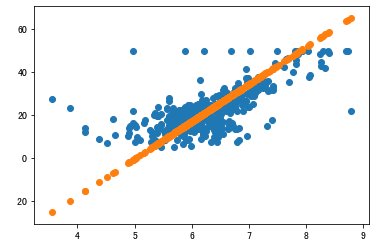

In [334]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm, y)
plt.scatter(X_rm, price_use_current_parameters)

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)